# Project: Investigate TMDb Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
###                         The Movie Database (TMDb)
This data set was cleaned from original data on Kaggle. It contains information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
Research questions to be analysed from the data set include:
1. Movies with highest profit
2. Movies with the lowest profit
3. Most popular movies
4. Least popular movies
5. A survey of the number of movies released each year
6. A survey of profits made each year from movies
7. A survey of movie genres


In [50]:
#Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [64]:
#loading the tmdb_data csv file
tmdb= pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [65]:
#Checking the datatypes of the attributes 
tmdb.info()
#Checking for null values
tmdb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [66]:
#Examining the values of "budget" and #revenue" attributes 
print(tmdb['budget'].value_counts())
print(tmdb['revenue'].value_counts())

#Checking data for duplicated rows
print("Number of dublicated rows is: ", tmdb.duplicated().sum())

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      165
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

### Observations from the data
1. The data has 10865 rows and 21 columns of types float(4), interger (6), and string (11)
2. Out of these 21 columns, 9 have null values.
3. The Budget column has 5696 zero values
4. The Revenue column has 6016 zero values
5. The dataset has one duplicated row.

### Data Cleaning 
Observing the data, the following operations will be performed to clean the dataset:
1. Certain columns will be dropped from the data since they will not be needed moving forward, based on the the research questions to be analysed. The columns to be retained include id, original_title, budget, revenue, popularity, release_year and genres.
2. All rows that have zero budget will be dropped.
3. All rows that have zero revenue will be dropped.
4. The duplicated row will be dropped.

In [67]:
#Selecting columns to be analysed
tmdb= tmdb[['id','original_title','budget','revenue','popularity','release_year','genres']]
tmdb.head()

,id,original_title,budget,revenue,popularity,release_year,genres
0,135397,Jurassic World,150000000,1513528810,32.985763,2015,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,150000000,378436354,28.419936,2015,Action|Adventure|Science Fiction|Thriller
2,262500,Insurgent,110000000,295238201,13.112507,2015,Adventure|Science Fiction|Thriller
3,140607,Star Wars: The Force Awakens,200000000,2068178225,11.173104,2015,Action|Adventure|Science Fiction|Fantasy
4,168259,Furious 7,190000000,1506249360,9.335014,2015,Action|Crime|Thriller


In [68]:
# Dropping all rows that have zero budget or zero revenue
tmdb_drop = ['budget', 'revenue']
def drop_zero(col):
    for x in col:
        tmdb.drop( tmdb[ tmdb[x]== 0 ].index , inplace=True)
    return tmdb

#calling the drop_zero function to drop zero values from budget and revenue
drop_zero(tmdb_drop) 
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 7 columns):
id                3855 non-null int64
original_title    3855 non-null object
budget            3855 non-null int64
revenue           3855 non-null int64
popularity        3855 non-null float64
release_year      3855 non-null int64
genres            3855 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 240.9+ KB


In [69]:
#Dopping a duplicated row
tmdb.drop_duplicates(inplace=True)
tmdb.shape

(3854, 7)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Movies with highest profit)

In [70]:
#Movies with highest profit
tmdb['profit'] = tmdb['revenue']-tmdb['budget'] #Profit = revenue-budget
tmdb.nlargest(5,'profit')

,id,original_title,budget,revenue,popularity,release_year,genres,profit
1386,19995,Avatar,237000000,2781505847,9.432768,2009,Action|Adventure|Fantasy|Science Fiction,2544505847
3,140607,Star Wars: The Force Awakens,200000000,2068178225,11.173104,2015,Action|Adventure|Science Fiction|Fantasy,1868178225
5231,597,Titanic,200000000,1845034188,4.355219,1997,Drama|Romance|Thriller,1645034188
0,135397,Jurassic World,150000000,1513528810,32.985763,2015,Action|Adventure|Science Fiction|Thriller,1363528810
4,168259,Furious 7,190000000,1506249360,9.335014,2015,Action|Crime|Thriller,1316249360


Avatar, Star wars, Titanic, Jurrassic World and Furious 7 have the highest profit. These movies are mostly action, thriller or adventure movies

### Research Question 2 (Movies with lowest profit)

In [71]:
#Movies with the lowest profit
tmdb.nsmallest(5,'profit')

,id,original_title,budget,revenue,popularity,release_year,genres,profit
2244,46528,The Warrior's Way,425000000,11087569,0.250540,2010,Adventure|Fantasy|Action|Western|Thriller,-413912431
5508,57201,The Lone Ranger,255000000,89289910,1.214510,2013,Action|Adventure|Western,-165710090
7031,10733,The Alamo,145000000,25819961,0.948560,2004,Western|History|War,-119180039
3484,50321,Mars Needs Moms,150000000,38992758,0.921653,2011,Adventure|Animation|Family,-111007242
4970,10009,Brother Bear,100000000,250,1.653031,2003,Animation|Adventure|Family|Fantasy,-99999750


The Warrior's Way, The Lone Ranger, The Alamo, Mars Needs Moms and Brother Bear are the least profitable movies. Actually the movies generated highest losses. 

### Research Question 3  (Most popular movies)

In [72]:
#Movies with the highest popularity
tmdb.nlargest(5,'popularity')

,id,original_title,budget,revenue,popularity,release_year,genres,profit
0,135397,Jurassic World,150000000,1513528810,32.985763,2015,Action|Adventure|Science Fiction|Thriller,1363528810
1,76341,Mad Max: Fury Road,150000000,378436354,28.419936,2015,Action|Adventure|Science Fiction|Thriller,228436354
629,157336,Interstellar,165000000,621752480,24.949134,2014,Adventure|Drama|Science Fiction,456752480
630,118340,Guardians of the Galaxy,170000000,773312399,14.311205,2014,Action|Science Fiction|Adventure,603312399
2,262500,Insurgent,110000000,295238201,13.112507,2015,Adventure|Science Fiction|Thriller,185238201


Jurassic World, Mad Max Fury Road, Interstellar, Guardians of the Galaxy, and Insurgent are the most popular movies. These movies are mostly action, adventure, science fiction or thriller.


### Research Question 4 (Least popular movies)

In [73]:
#Movies with the least popularity
tmdb.nsmallest(5,'popularity')

,id,original_title,budget,revenue,popularity,release_year,genres,profit
7268,1392,Born into Brothels,350000,3515061,0.001117,2004,Documentary,3165061
6065,203793,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,30000000,68129518,0.010335,2013,War|Action,38129518
8066,26978,Spacehunter: Adventures in the Forbidden Zone,15000000,16500000,0.015727,1983,Adventure|Science Fiction,1500000
8883,36047,The In Crowd,15000000,5217498,0.015997,2000,Thriller,-9782502
10218,23479,The Bad News Bears,35000000,35323292,0.017498,1976,Comedy|Family,323292


Born into Brothels, Spacehunter, The In Crowd, and The Bad News Bears are among the least popular movies. These are mainly comedy movies

### Research Question 5 (Survey of the number of movies released each year)

Text(0.5,1,'Number of movies released each year')

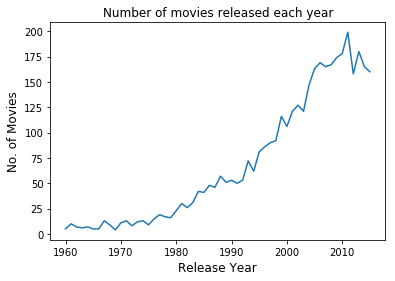

In [74]:
#A plot movies released each year
movie_count=tmdb.groupby('release_year').count()['id']
plt.plot(movie_count)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('No. of Movies', fontsize = 12)
plt.title('Number of movies released each year')

The number of movies released each year have been rising since 1960 and peaked in 2009-2010. About 200 movies with more than zero budgets or revenue were released in 2010.

### Research Question 6 (Profits made each year from movies)

Text(0.5,1,'Profit made from movies each year')

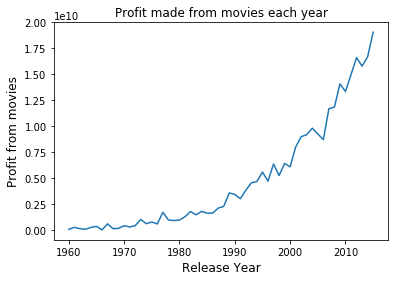

In [79]:
annual_profits = tmdb.groupby('release_year')['profit'].sum()
plt.plot(annual_profits)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Profit from movies', fontsize = 12)
plt.title('Profit made from movies each year')

Similar to the trend for the number of movies released each year, the collective profit made from movies each year has continued to rise after 2010. 

### Research Question 7 (A survey of movie genres)

Text(0,0.5,'No. of Movies')

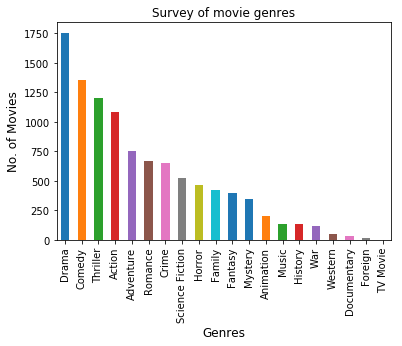

In [76]:
genre_data = tmdb['genres'].str.cat(sep = '|') #separates string by '/'
    
#storing the genres in a pandas series
genre_data = pd.Series(genre_data.split('|'))

#Displaying the data using a bar chart
genre_data.value_counts().plot(kind='bar') 
plt.title('Survey of movie genres')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('No. of Movies', fontsize = 12)


Drama, Comedy, Thriller, Action and Adventure are the most popular movie generes

<a id='conclusions'></a>
## Conclusions

Three movies that generated the highest profit are also the most popular. The movies are Jurassic World, Mad Max: Fury Road, and Insurgent. These movies are mostly of action, adventure and science fiction genres. The same conclusion could not be made about the least profitable movies, however these movies are mostly Comedies.

Although the most popular or profitable movies are not drama, drama is the most popular genre of movie. Also, even though the least poupular movies are comedy movies, comedy is the second most popular movie genre. 

These results are based on Movie Database (TMDb)and the movies which had null or zero budget/revenue. Budget and revenues may have been wrongly entered. 

In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0